In [1]:
import os

import h5py
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.colors import LogNorm, Normalize

file_path = "/mnt/WD14TB/tianaoli/LSST_Synthetic/" # path to data

In [53]:
files = os.listdir(file_path)
files.remove('galaxy_postagestamps')
print(len(files))
files.sort()
for file_name in files:
    try:
        file = h5py.File(os.path.join(file_path, file_name),'r')   
    except:
        print(file_name) 

83


In [17]:
file_name = "data_0_Mpc_10.0_kpcpix3d_0.25_snap99_rband.hdf5"
file = h5py.File(os.path.join(file_path, file_name),'r')    

In [5]:
galaxyIDs = np.array(file['labels']['galaxyID']).astype(int)
galaxy = np.array(file['image_data_30']['galaxy_562338_xy'])

In [ ]:
file['labels'].keys()

<KeysViewHDF5 ['galaxyID', 'label_frac_light_28_30_totot', 'label_frac_light_28_30_tovis', 'label_frac_pixels_28_30_totot', 'label_frac_pixels_28_30_tovis', 'projection_plane']>

In [ ]:
def mag_to_flux(img_mag, zero_point=28.36):
    return 10**(-0.4*(img_mag-zero_point))

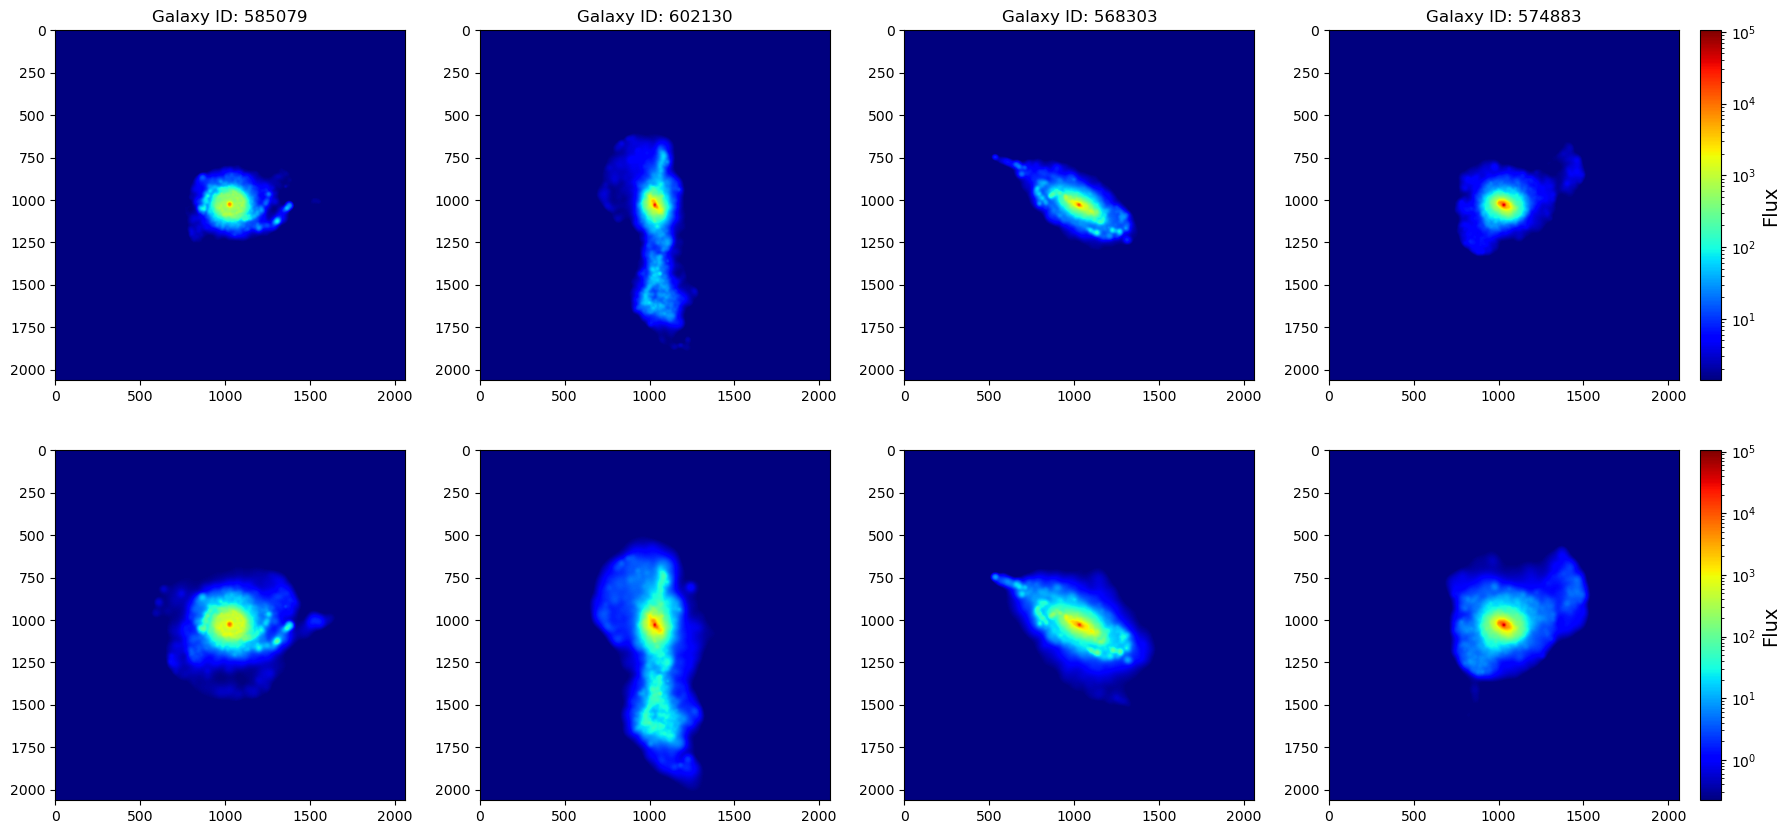

In [ ]:
indices = [21, 51, 11, 16]
fig = plt.figure(figsize=(21, 10))
norm1 = LogNorm(vmin=mag_to_flux(28), vmax=1.05e5)
norm2 = LogNorm(vmin=mag_to_flux(30), vmax=1.05e5)
for k, idx in enumerate(indices):
    galaxy_28 = mag_to_flux(np.array(file['image_data_28'][f'galaxy_{galaxyIDs[idx]}_xy']))
    ax1 = plt.subplot(2, len(indices), k+1)
    plt.imshow(galaxy_28, cmap='jet', norm=norm1)
    plt.title(f'Galaxy ID: {galaxyIDs[idx]}')
    if k == len(indices)-1:
        cax1 = fig.add_axes([ax1.get_position().x1+1e-2, ax1.get_position().y0, 1e-2, ax1.get_position().height])
        plt.colorbar(cax=cax1)
        cax1.set_ylabel('Flux', fontsize=14)
    
    galaxy_30 = mag_to_flux(np.array(file['image_data_30'][f'galaxy_{galaxyIDs[idx]}_xy']))
    ax2 = plt.subplot(2, len(indices), k+1+len(indices))
    plt.imshow(galaxy_30, cmap='jet', norm=norm2)
    if k == len(indices)-1:
        cax2 = fig.add_axes([ax2.get_position().x1+1e-2, ax2.get_position().y0, 1e-2, ax2.get_position().height])
        plt.colorbar(cax=cax2)
        cax2.set_ylabel('Flux', fontsize=14)